In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import os
from transformers import AutoModel

from apx import ApproxEmbed, plot_compare_result_runs, load_runs, calc_size

c:\Users\Sam\miniconda3\envs\torch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = AutoModel.from_pretrained('prajjwal1/bert-tiny')
embeddings=model.embeddings.word_embeddings.weight
embeddings.shape

Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


torch.Size([30522, 128])

In [ ]:
runs1 = load_runs('results/compression_pretrained/1_layer/', fixed=True)
runs2 = load_runs('results/compression_pretrained/2_layers/', fixed=True)

2
4
8
16
32
2
4
8
16
32


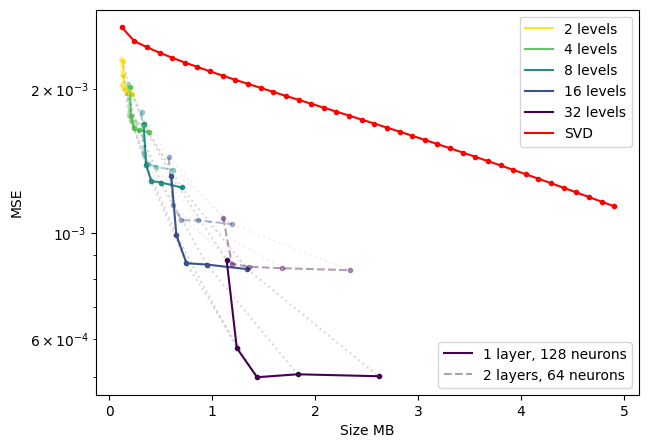

In [4]:
import numpy as np


levs={}
for run in runs1:
    if run['level'] not in levs.keys():
        levs[run['level']]=[]
    levs[run['level']].append(run)

LEVELS = np.sort(np.array(list(levs.keys())))
max_s=torch.max(embeddings).item()

color = plt.cm.viridis(1-np.linspace(0, 1, len(LEVELS)))

lines=[]

fig, ax = plt.subplots(figsize=(7,5))
for l in np.sort(np.array(list(levs.keys())),axis=0):
    print(l)
    size= np.array([calc_size(list(run['apx'].parameters())) for run in levs[l]])/1e6
    loss = np.array([np.min(run['loss']) for run in levs[l]])
    idx = np.argsort(size)
    #snr = 10*np.log10(max_s/loss)
    txt = [run['channel'] for run in levs[l]]
    ax.plot(size[idx], loss[idx], '.', color=color[np.where(np.array(LEVELS)==l)])
    lines.append(ax.plot(size[idx], loss[idx], color=color[np.where(np.array(LEVELS)==l)], label=f"{l} levels")[0])

for i in range(len(levs[l])):
    runs=[levs[l][i] for l in np.sort(np.array(list(levs.keys())),axis=0)]
    size= np.array([calc_size(list(run['apx'].parameters())) for run in runs])/1e6
    loss = np.array([np.min(run['loss']) for run in runs])
    idx = np.argsort(size)
    ax.plot(size[idx], loss[idx], ':', color="k", alpha=0.15)


levs={}
for run in runs2:
    if run['level'] not in levs.keys():
        levs[run['level']]=[]
    levs[run['level']].append(run)

LEVELS = np.sort(np.array(list(levs.keys())))
max_s=torch.max(embeddings).item()

color = plt.cm.viridis(1-np.linspace(0, 1, len(LEVELS)))

for l in np.sort(np.array(list(levs.keys())),axis=0):
    print(l)
    size= np.array([calc_size(list(run['apx'].parameters())) for run in levs[l]])/1e6
    loss = np.array([np.min(run['loss']) for run in levs[l]])
    idx = np.argsort(size)
    #snr = 10*np.log10(max_s/loss)
    txt = [run['channel'] for run in levs[l]]
    ax.plot(size[idx], loss[idx], '.', color=color[np.where(np.array(LEVELS)==l)], alpha=0.4)
    lines.append(ax.plot(size[idx], loss[idx],'--', color=color[np.where(np.array(LEVELS)==l)], alpha=0.4)[0])

for i in range(len(levs[l])):
    runs=[levs[l][i] for l in np.sort(np.array(list(levs.keys())),axis=0)]
    size= np.array([calc_size(list(run['apx'].parameters())) for run in runs])/1e6
    loss = np.array([np.min(run['loss']) for run in runs])
    idx = np.argsort(size)
    ax.plot(size[idx], loss[idx], ':', color="k", alpha=0.05)


S,V,D = np.linalg.svd(embeddings.detach().cpu(),full_matrices=False)

# plot 
N=list(np.arange(40)+1)

size=np.array([calc_size([S[:,:n],V[:n],D[:n]]) for n in N])/1e6
loss=np.array([torch.mean(torch.square(torch.tensor((S[:,:n]*V[:n])@D[:n],device=embeddings.device)-embeddings)).item() for n in N])
#snr = 10*np.log10(max_s/loss)

ax.plot(size, loss,'.', color='r')
ax.plot(size, loss, color='r', label=f"SVD")

legend1 = plt.legend([lines[i] for i in (np.arange(2)+1)*len(LEVELS)-1], ["1 layer, 128 neurons", "2 layers, 64 neurons"], loc='lower right')

plt.xlabel('Size MB')
plt.ylabel('MSE')
plt.yscale('log')
plt.legend()
plt.gca().add_artist(legend1)

In [5]:
torch.load('results/compression_pretrained/APX2/2_2.pth')['apx'].keys()

odict_keys(['B.dictionary', 'B.feats0', 'B.feats1', 'N.0.weight', 'N.0.bias', 'N.2.weight', 'N.2.bias'])

In [7]:
runs2 = load_runs('results/compression_pretrained/APX2/', fixed=True)
runs1 = load_runs('results/compression_pretrained/1_layer/', fixed=True)

2
4
8
16
32
2
4
8
16
32


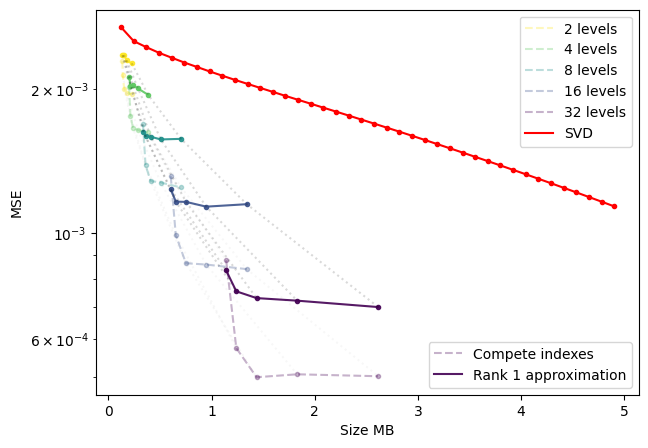

In [16]:
import numpy as np


levs={}
for run in runs1:
    if run['level'] not in levs.keys():
        levs[run['level']]=[]
    levs[run['level']].append(run)

LEVELS = np.sort(np.array(list(levs.keys())))
max_s=torch.max(embeddings).item()

color = plt.cm.viridis(1-np.linspace(0, 1, len(LEVELS)))

lines=[]

fig, ax = plt.subplots(figsize=(7,5))
for l in np.sort(np.array(list(levs.keys())),axis=0):
    print(l)
    size= np.array([calc_size(list(run['apx'].parameters())) for run in levs[l]])/1e6
    loss = np.array([np.min(run['loss']) for run in levs[l]])
    idx = np.argsort(size)
    #snr = 10*np.log10(max_s/loss)
    txt = [run['channel'] for run in levs[l]]
    ax.plot(size[idx], loss[idx], '.', color=color[np.where(np.array(LEVELS)==l)], alpha=0.3)
    lines.append(ax.plot(size[idx], loss[idx],'--', color=color[np.where(np.array(LEVELS)==l)], label=f"{l} levels", alpha=0.3)[0])

for i in range(len(levs[l])):
    runs=[levs[l][i] for l in np.sort(np.array(list(levs.keys())),axis=0)]
    size= np.array([calc_size(list(run['apx'].parameters())) for run in runs])/1e6
    loss = np.array([np.min(run['loss']) for run in runs])
    idx = np.argsort(size)
    ax.plot(size[idx], loss[idx], ':', color="k", alpha=0.03)


levs={}
for run in runs2:
    if run['level'] not in levs.keys():
        levs[run['level']]=[]
    levs[run['level']].append(run)

LEVELS = np.sort(np.array(list(levs.keys())))
max_s=torch.max(embeddings).item()

color = plt.cm.viridis(1-np.linspace(0, 1, len(LEVELS)))

for l in np.sort(np.array(list(levs.keys())),axis=0):
    print(l)
    size= np.array([calc_size(list(run['apx'].parameters())) for run in levs[l]])/1e6
    loss = np.array([np.min(run['loss']) for run in levs[l]])
    idx = np.argsort(size)
    #snr = 10*np.log10(max_s/loss)
    txt = [run['channel'] for run in levs[l]]
    ax.plot(size[idx], loss[idx], '.', color=color[np.where(np.array(LEVELS)==l)], alpha=0.9)
    lines.append(ax.plot(size[idx], loss[idx], color=color[np.where(np.array(LEVELS)==l)], alpha=0.9)[0])

for i in range(len(levs[l])):
    runs=[levs[l][i] for l in np.sort(np.array(list(levs.keys())),axis=0)]
    size= np.array([calc_size(list(run['apx'].parameters())) for run in runs])/1e6
    loss = np.array([np.min(run['loss']) for run in runs])
    idx = np.argsort(size)
    ax.plot(size[idx], loss[idx], ':', color="k", alpha=0.15)


S,V,D = np.linalg.svd(embeddings.detach().cpu(),full_matrices=False)

# plot 
N=list(np.arange(40)+1)

size=np.array([calc_size([S[:,:n],V[:n],D[:n]]) for n in N])/1e6
loss=np.array([torch.mean(torch.square(torch.tensor((S[:,:n]*V[:n])@D[:n],device=embeddings.device)-embeddings)).item() for n in N])
#snr = 10*np.log10(max_s/loss)

ax.plot(size, loss,'.', color='r')
ax.plot(size, loss, color='r', label=f"SVD")

legend1 = plt.legend([lines[i] for i in (np.arange(2)+1)*len(LEVELS)-1], ["Compete indexes", "Rank 1 approximation"], loc='lower right')

plt.xlabel('Size MB')
plt.ylabel('MSE')
plt.yscale('log')
plt.legend()
plt.gca().add_artist(legend1)